In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
import pandas as pd

In [2]:
confirmed_df = pd.read_csv("time_series_covid19_confirmed_global.csv")
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


In [3]:
death_df = pd.read_csv("time_series_covid19_deaths_global.csv")
death_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


In [4]:
recovered_df = pd.read_csv("time_series_covid19_recovered_global.csv")
recovered_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [5]:
confirmed_df_TS = confirmed_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1)
confirmed_df_TS_summation = confirmed_df_TS.sum()
confirmed_df_TS_summation

1/22/20         555
1/23/20         654
1/24/20         941
1/25/20        1434
1/26/20        2118
             ...   
9/17/20    30175313
9/18/20    30499534
9/19/20    30780755
9/20/20    31021972
9/21/20    31245797
Length: 244, dtype: int64

In [9]:
new_columns = ['confirmed_world']
data= pd.DataFrame(confirmed_df_TS_summation, columns = new_columns)
data

,confirmed_world
1/22/20,555
1/23/20,654
1/24/20,941
1/25/20,1434
1/26/20,2118
...,...
9/17/20,30175313
9/18/20,30499534
9/19/20,30780755
9/20/20,31021972


<AxesSubplot:>

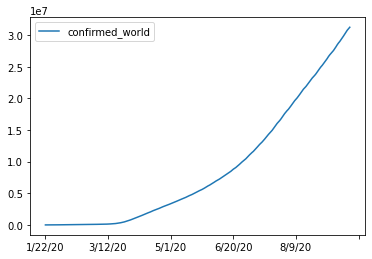

In [11]:
data.plot() 

In [12]:
#Check for Data stationary 
#If p< 0.05 ; Data is stationary
#if p>0.05; Data is not stationary

from statsmodels.tsa.stattools import adfuller
def ad_test(data):
     dftest = adfuller(data, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
        
ad_test(data['confirmed_world'])

1. ADF :  -1.2614395009134918
2. P-Value :  0.6466240713103376
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression: 228
5. Critical Values :
	 1% :  -3.4593607492757554
	 5% :  -2.8743015807562924
	 10% :  -2.5735714042782396


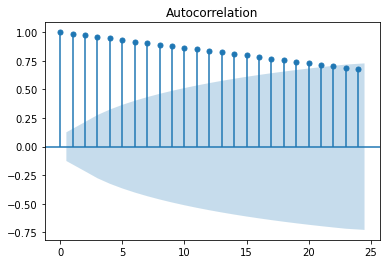

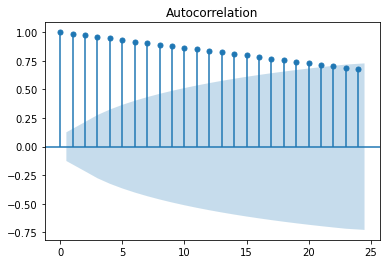

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

## Arima Model

In [14]:
# Test train data split 
print(data.shape)
train=data.iloc[:220] #220 data
test=data.iloc[220:] #24 data
predictions = []
print(test.shape)
print(train.shape)

(244, 1)
(24, 1)
(220, 1)


In [15]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq
    

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 7581.654255117324
(0, 0, 1) 7287.651836996141
(0, 0, 2) 6998.834514042198
(0, 0, 3) 6729.596663670759
(0, 0, 4) 6485.913987189726
(0, 1, 0) 5632.821433186123
(0, 1, 1) 5386.639204575884
(0, 1, 4) 5028.963500570245
(0, 2, 0) 4830.150523340364
(0, 2, 1) 4828.358148161111
(0, 2, 2) 4800.951514115912
(0, 2, 3) 4774.8997663009295
(0, 2, 4) 4756.693334519239
(1, 0, 0) 5879.983680274435
(1, 1, 0) 4858.979658601779
(1, 1, 1) 4856.424207737476
(1, 1, 2) 4841.239260879094
(1, 1, 3) 4815.5590858799405
(1, 1, 4) 4795.127411076779
(1, 2, 0) 4829.445209008886
(1, 2, 2) 4790.5129551726395
(1, 2, 3) 4790.056041389531
(2, 1, 0) 4857.576046079715
(2, 1, 2) 4830.796899093931
(2, 1, 3) 4823.494288339378
(2, 2, 0) 4821.891615699292
(2, 2, 2) 4664.475007790747
(3, 1, 0) 4851.271440862336
(3, 1, 2) 4708.234575734595
(3, 2, 0) 4784.300314630412
(3, 2, 2) 4644.314322902794
(4, 1, 0) 4816.37212989855
(4, 2, 0) 4759.490906825414
(4, 2, 1) 4718.995305159821


In [18]:
model_arima = ARIMA(train,order=(3,2,2)) # p d q (past,int,errors)
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

4644.314322902794


In [19]:
predictions = model_arima_fit.forecast(steps=24)[0]
predictions

array([24987403.50641135, 25223169.77465152, 25459366.15777124,
       25716149.71654732, 25997882.95587052, 26291578.63811135,
       26576538.47761752, 26839998.67299215, 27086265.34625713,
       27333073.00286738, 27598112.14553704, 27885981.66007151,
       28185166.72146218, 28476991.9042127 , 28749602.46773592,
       29006516.7470881 , 29263593.92219786, 29536983.2577459 ,
       29831201.49549008, 30136130.85788705, 30434899.13288753,
       30716519.19678147, 30983827.83034364, 31251000.31832507])

In [20]:
test.shape

(24, 1)

In [21]:
predictions.shape

(24,)

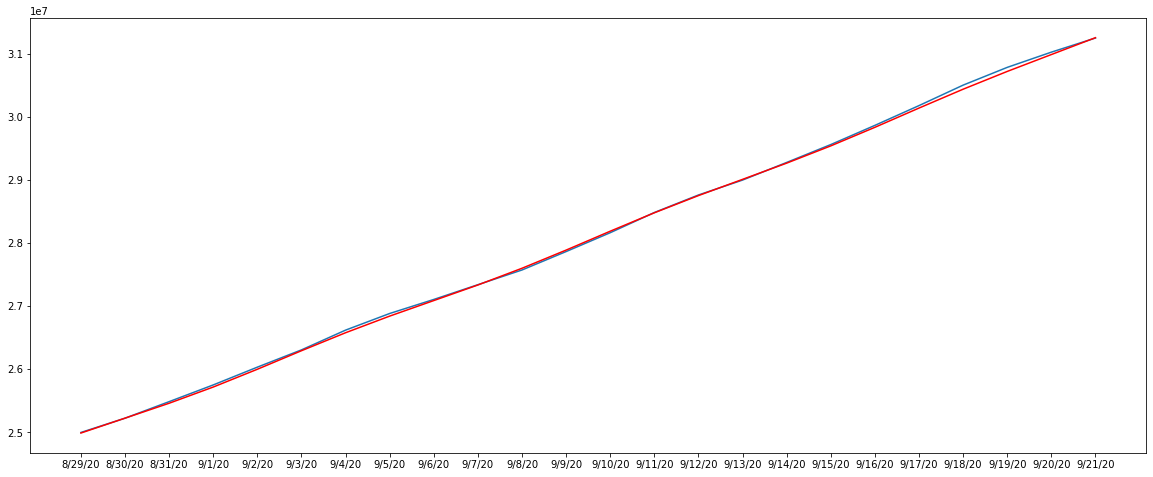

In [22]:
plt.figure(figsize = (20,8))
plt.plot(test)
plt.plot(predictions,color='red')

In [24]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from math import sqrt

  
mse = mean_squared_error(test.confirmed_world, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 30164.160644


## AR Model 

In [25]:
df_diff = data.diff(periods=1)
df_diff.head()

,confirmed_world
1/22/20,NaN
1/23/20,99.0
1/24/20,287.0
1/25/20,493.0
1/26/20,684.0


In [26]:
df_diff = df_diff[1:]
df_diff.head()

,confirmed_world
1/23/20,99.0
1/24/20,287.0
1/25/20,493.0
1/26/20,684.0
1/27/20,809.0


<AxesSubplot:>

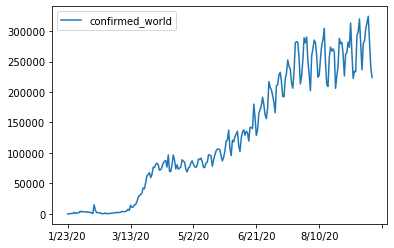

In [27]:
df_diff.plot()

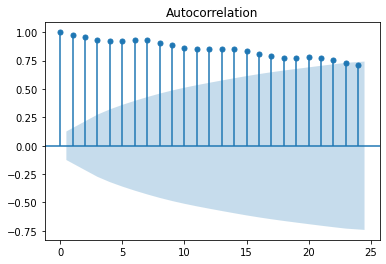

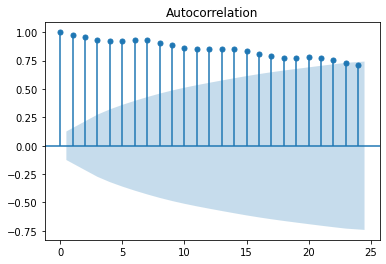

In [28]:
plot_acf(df_diff)

In [29]:
df_diff.shape

(243, 1)

In [30]:
train = df_diff[:220]
test = df_diff[220:]

In [31]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [32]:
predictions = model_ar_fit.predict(start=220,end=242)
predictions

2020-08-30    231639.423703
2020-08-31    225678.753737
2020-09-01    261498.650746
2020-09-02    288906.757970
2020-09-03    298933.523854
2020-09-04    290181.126939
2020-09-05    271402.117493
2020-09-06    237705.073019
2020-09-07    240673.025595
2020-09-08    266554.142391
2020-09-09    300946.368772
2020-09-10    308590.205341
2020-09-11    302210.918893
2020-09-12    275376.969899
2020-09-13    249451.083044
2020-09-14    246929.883126
2020-09-15    276990.029424
2020-09-16    307675.993485
2020-09-17    321221.060208
2020-09-18    309708.701965
2020-09-19    283413.393415
2020-09-20    255844.933817
2020-09-21    256672.614723
Freq: D, dtype: float64

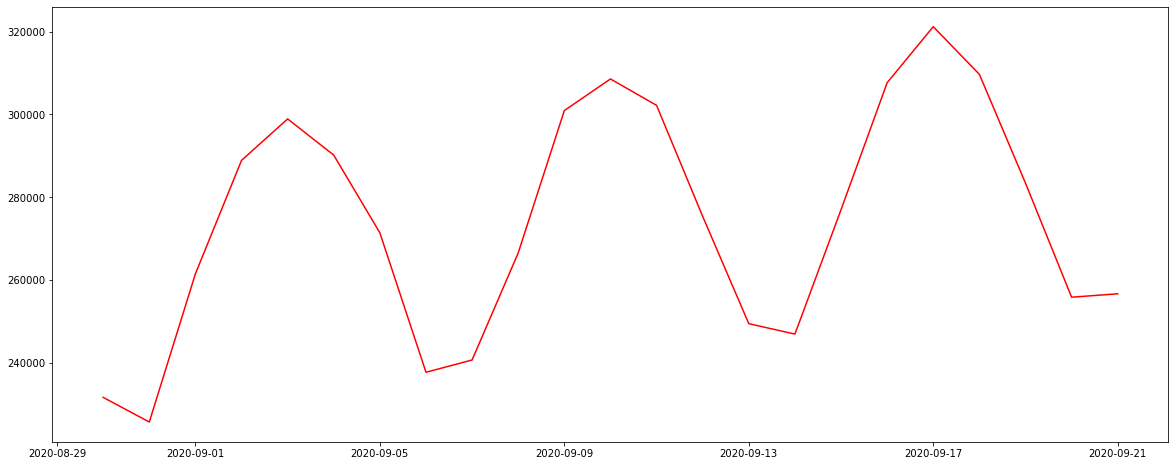

In [33]:
plt.figure(figsize = (20,8))
plt.plot(predictions,color='red')

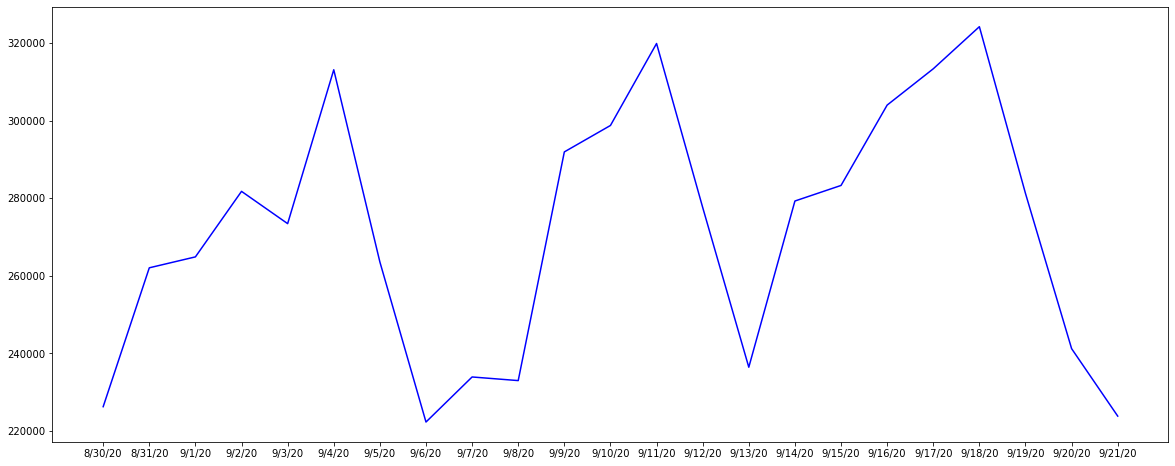

In [34]:
plt.figure(figsize = (20,8))
plt.plot(test,color='blue')

In [35]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from math import sqrt

  
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 17932.741869
